In [153]:
import pandas as pd

In [154]:
df = pd.read_csv("month.csv", header=None, names=["time","counts","span"])

In [155]:
import datetime

In [156]:
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s')

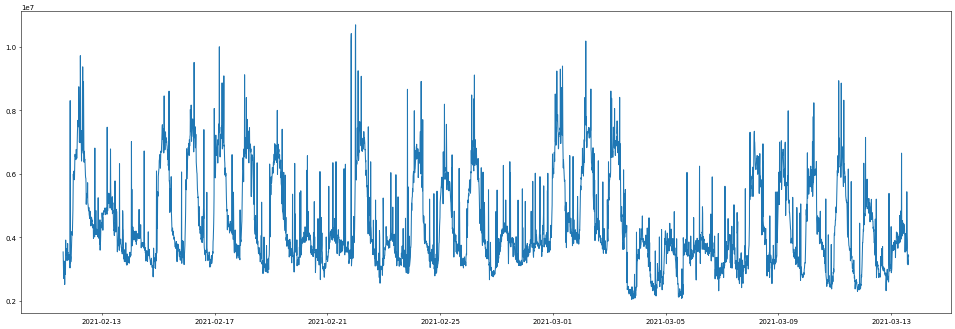

In [157]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

plt.figure(figsize=(24, 8), dpi=50)
plt.plot(df['time'], df['counts'])

In [158]:
P = df['counts'].dropna()
Q = np.array(P).reshape(-1,1)
print(len(Q))

4320


In [159]:
import numpy as np

X1 = Q[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Q[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Q[2:L-1, :]  # 予測対象日の前日データ
Y = Q[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [160]:
print(X2)

[[3178905]
 [2973552]
 [2825833]
 ...
 [3289105]
 [3139526]
 [3189467]]


In [161]:
from sklearn.preprocessing import MinMaxScaler


In [162]:
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。
scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

In [163]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。
# train, testデータを定義
X_train = X[:1200, :, :]
X_test = X[1200:, :, :]
Y_train = Y[:1200, :]
Y_test = Y[1200:, :]

In [164]:
print(X)

[[[0.17294255 0.13085409 0.10710354]]

 [[0.13085409 0.10710354 0.09001877]]

 [[0.10710354 0.09001877 0.07575951]]

 ...

 [[0.13734801 0.14359951 0.12629963]]

 [[0.14359951 0.12629963 0.13207566]]

 [[0.12629963 0.13207566 0.16236732]]]


In [165]:
from keras.models import Sequential
from keras.layers import Dense,  LSTM
from keras import metrics

model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
model.fit(X_train, Y_train, epochs=100, verbose=2)

Epoch 1/100
38/38 - 3s - loss: 0.0934 - mean_absolute_error: 0.2562
Epoch 2/100
38/38 - 0s - loss: 0.0400 - mean_absolute_error: 0.1474
Epoch 3/100
38/38 - 0s - loss: 0.0162 - mean_absolute_error: 0.0975
Epoch 4/100
38/38 - 0s - loss: 0.0104 - mean_absolute_error: 0.0850
Epoch 5/100
38/38 - 0s - loss: 0.0074 - mean_absolute_error: 0.0684
Epoch 6/100
38/38 - 0s - loss: 0.0055 - mean_absolute_error: 0.0540
Epoch 7/100
38/38 - 0s - loss: 0.0047 - mean_absolute_error: 0.0452
Epoch 8/100
38/38 - 0s - loss: 0.0044 - mean_absolute_error: 0.0411
Epoch 9/100
38/38 - 0s - loss: 0.0044 - mean_absolute_error: 0.0393
Epoch 10/100
38/38 - 0s - loss: 0.0044 - mean_absolute_error: 0.0390
Epoch 11/100
38/38 - 0s - loss: 0.0043 - mean_absolute_error: 0.0386
Epoch 12/100
38/38 - 0s - loss: 0.0043 - mean_absolute_error: 0.0388
Epoch 13/100
38/38 - 0s - loss: 0.0043 - mean_absolute_error: 0.0385
Epoch 14/100
38/38 - 0s - loss: 0.0043 - mean_absolute_error: 0.0382
Epoch 15/100
38/38 - 0s - loss: 0.0043 - me

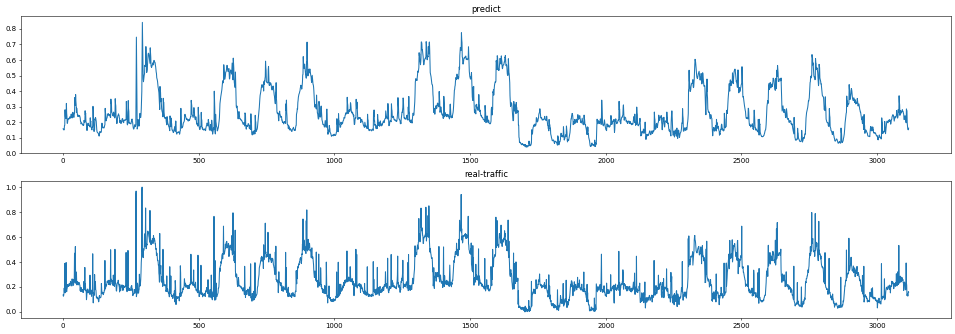

In [179]:
Predict = model.predict(X_test)

#plt.figure(figsize=(24, 8), dpi=50)
#plt.plot(Predict)
#plt.plot(Y_test)


plt.figure(figsize=(24, 8), dpi=50)
plt.subplot(211)
plt.title("predict")
plt.plot(Predict)
plt.subplot(212)
plt.title("real-traffic")
plt.plot(Y_test)

# オリジナルのスケールに戻す、タイムインデックスを付ける。
#Y_train = scaler1.inverse_transform(Y_train)
#Y_train = pd.DataFrame(Y_train)
#Y_train.index = pd.to_datetime(df.iloc[3:1194,0])
#Y_test = scaler1.inverse_transform(Y_test)
#Y_test = pd.DataFrame(Y_test)
#Y_test.index = pd.to_datetime(df.iloc[1194:,0])
#Predict = scaler1.inverse_transform(Predict)
#Predict = pd.DataFrame(Predict)
#Predict.index=pd.to_datetime(df.iloc[1194:,0])
#plt.figure(figsize=(15,10))
#plt.plot(Y_test, label = 'Test')
#plt.plot(Predict, label = 'Prediction')
#plt.legend(loc='best')
#plt.show()